In [ ]:
import os
import numpy as np
import zipfile

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten

In [ ]:
base_model = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
inputs = tf.keras.Input((224,224,3))
x = base_model(inputs,training=False)
x = Flatten()(x) #tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(1000,activation='softmax')(x) #Unique image objects: 75,729
image_model = Model(inputs,output)

In [ ]:
image_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1000)              25089000  
                                                                 
Total params: 39,803,688
Trainable params: 25,089,000
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
import cv2
img = cv2.imread('/content/img_embed1.jpeg')

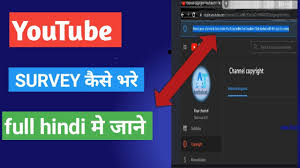

(168, 300, 3)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
img.shape

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img = cv2.resize(img,(224,224),3)


In [ ]:
img.shape

(224, 224, 3)

In [ ]:
print(image_model.predict(np.array([img]))[0])

1/1 [==============================] - 1s 695ms/step
[2.07960298e-20 7.49280993e-24 5.33045950e-29 9.62313522e-14
 2.32944940e-16 5.99844238e-19 1.25243621e-10 4.14141625e-22
 1.83353388e-22 7.82277590e-22 3.61374110e-20 8.42354797e-11
 1.37258724e-16 2.47086987e-21 1.16385411e-19 1.03337844e-18
 2.55180814e-18 3.79931626e-16 2.91760244e-27 5.01591824e-13
 2.47151810e-23 2.02041734e-19 1.24276229e-15 7.27490876e-13
 6.96739715e-12 3.60427678e-01 5.38457760e-14 2.54870809e-08
 3.88660374e-05 3.25697678e-15 5.31913530e-18 8.62393824e-17
 6.56538574e-11 1.40605756e-11 1.27510667e-20 1.65229774e-11
 3.03548111e-20 2.38466100e-18 6.15122937e-23 8.41526770e-17
 4.19117319e-09 9.48288061e-20 3.83997613e-27 2.70842060e-24
 5.72413853e-07 1.89386331e-18 1.21433774e-18 3.21133738e-14
 5.65715348e-20 2.40956989e-18 1.56401081e-20 7.48491115e-20
 7.86867221e-18 3.16365857e-12 1.42580980e-19 2.43560827e-21
 2.20956260e-16 1.69712271e-19 1.78223177e-17 4.37891324e-23
 1.10923746e-17 1.59574453e-15 1

In [ ]:
len(image_model.predict(np.array([img]))[0])

1/1 [==============================] - 1s 554ms/step


1000